In [1]:
import os.path
import numpy as np
import pandas as pd
from scipy.fft import fft

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
#%matplotlib notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#display(HTML(f"<style>.container {{ height: {400}px !important; }}</style>"))

In [2]:
file_folder = '/home/anna/annaCode/UiO/MEK4350/notebooks/Data_undervisning200923'
date_format = '%m/%d/%Y %H:%M:%S.%f'

#distances are taken from the wavemaker
distances_between_probes = np.array([6.98, 8.155, 12.325, 16.995])

df_list = []
for i in range(1,5):
    file_path =  os.path.join(file_folder, f"proberun{i}_tett.csv")
    df = pd.read_csv(file_path, names = ['date_string', 'probe_1_raw', 'probe_2_raw', 'probe_3_raw', 'probe_4_raw', 'sensors'])
    df['date_time'] = pd.to_datetime(df['date_string'], format=date_format)
    df['elapsed_secs'] =  (df['date_time'] - df.at[0, 'date_time']).dt.total_seconds()
    #calculate amplitudes
    df['probe_1'] = df['probe_1_raw'][0] - df['probe_1_raw']
    df['probe_2'] = df['probe_2_raw'][0] - df['probe_2_raw']
    df['probe_3'] = df['probe_3_raw'][0] - df['probe_3_raw']
    df['probe_4'] = df['probe_4_raw'][0] - df['probe_4_raw']
    for j in range(1,5):
        df[f'probe_{j}_hat'] =fft(df[f'probe_{j}'].to_numpy())
    df_list.append(df)
    
df = df_list[0]
df.head(2)


sample_no = df.shape[0]
sampling_rate = sample_no/df.elapsed_secs.iloc[-1]
frequencies = np.fft.fftfreq(sample_no, d=1/sampling_rate)

In [3]:
distance_ratio = distances_between_probes[1] - distances_between_probes[0]
log_part = np.log(np.abs(df['probe_2_hat'] / df['probe_1_hat']))
growth_ratio = distance_ratio * log_part

distance_ratio2 = distances_between_probes[2] - distances_between_probes[0]
log_part2 = np.log(np.abs(df['probe_3_hat'] / df['probe_1_hat']))
growth_ratio2 = distance_ratio2 * log_part2

In [4]:
growth_ratios = []
for i in range(1,4):
    distance_ratio = distances_between_probes[i] - distances_between_probes[0]
    log_part = np.log(np.abs(df[f'probe_{i+1}_hat'] / df['probe_1_hat']))
    growth_ratio = distance_ratio * log_part
    growth_ratios.append(growth_ratio)


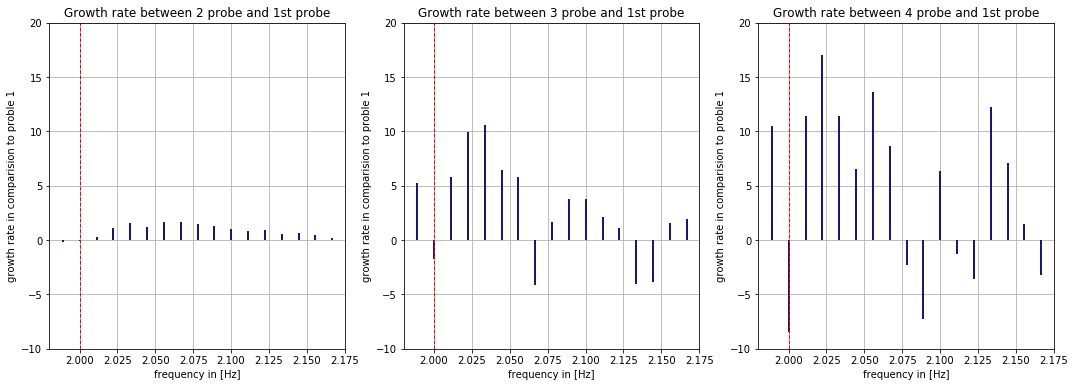

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
for i, ax in enumerate(axes):
    ax.grid()
    ax.set_ylim(-10,20)
    ax.set_xlim(1.98,2.175)
    ax.vlines(frequencies, 0, growth_ratios[i],  linewidth=2, color = 'midnightblue')
    ax.axvline(x=2, color='red', linestyle='--', linewidth=1, label=f'f = 2Hz')
    ax.set_ylabel('growth rate in comparision to proble 1')
    ax.set_xlabel('frequency in [Hz]')
    ax.set_title(f'Growth rate between {i+2} probe and 1st probe')


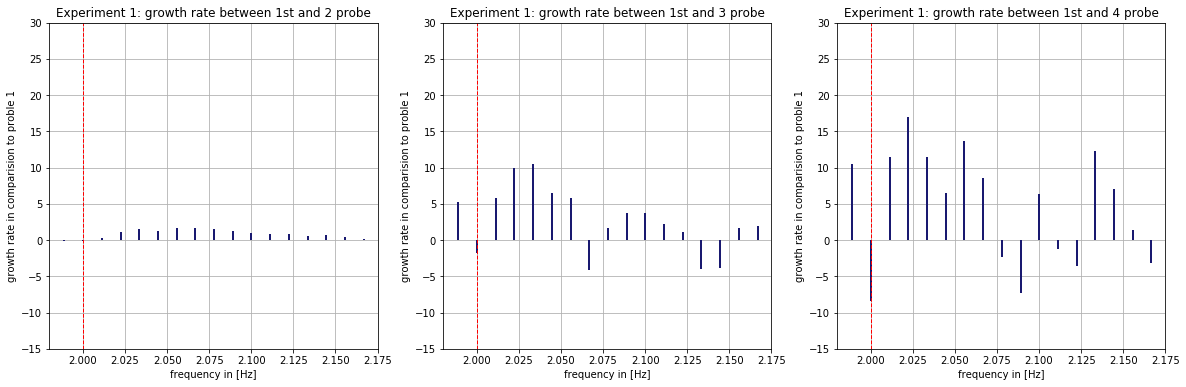

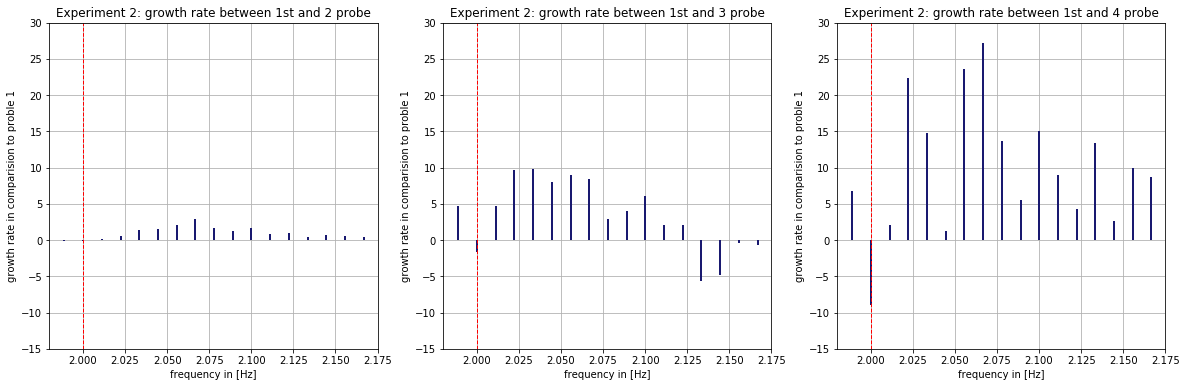

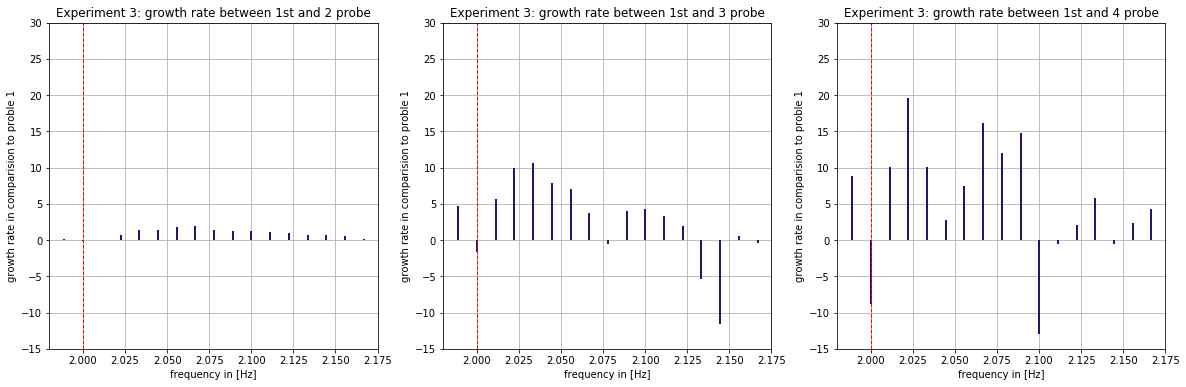

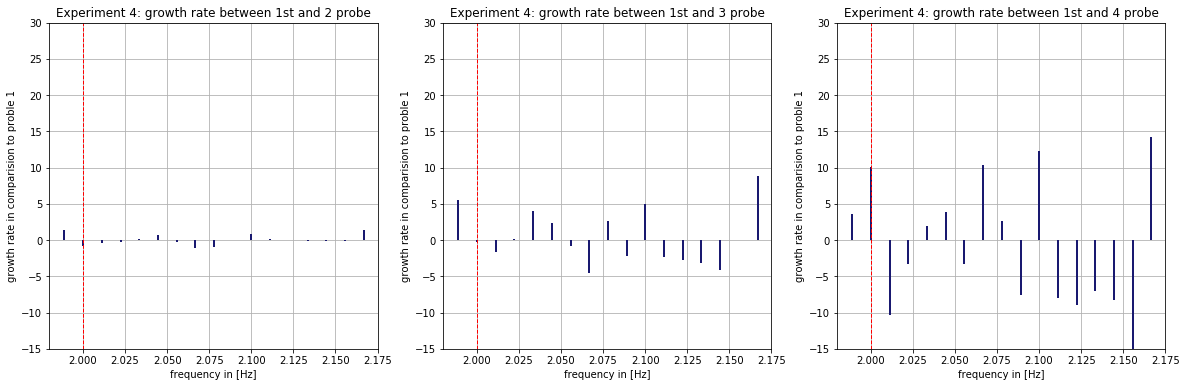

In [6]:
def plot_growth(experiment_no, df):
    growth_ratios = []
    for i in range(1,4):
        distance_ratio = distances_between_probes[i] - distances_between_probes[0]
        log_part = np.log(np.abs(df[f'probe_{i+1}_hat'] / df['probe_1_hat']))
        growth_ratio = distance_ratio * log_part
        growth_ratios.append(growth_ratio)    
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 
    for i, ax in enumerate(axes):
        ax.grid()
        ax.set_ylim(-15,30)
        ax.set_xlim(1.98,2.175)
        ax.vlines(frequencies, 0, growth_ratios[i],  linewidth=2, color = 'midnightblue')
        ax.axvline(x=2, color='red', linestyle='--', linewidth=1, label=f'f = 2Hz')
        ax.set_ylabel('growth rate in comparision to proble 1')
        ax.set_xlabel('frequency in [Hz]')
        ax.set_title(f'Experiment {experiment_no}: growth rate between 1st and {i+2} probe')
        
for index, df in enumerate(df_list):
    plot_growth(index+1, df)
        